In [1]:
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 2.2 MB/s eta 0:00:00


In [2]:
import patoolib
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

In [3]:
patoolib.extract_archive("/content/Dataset.zip")

INFO patool: Extracting /content/Dataset.zip ...
INFO:patool:Extracting /content/Dataset.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_aa1va7z7 -- /content/Dataset.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_aa1va7z7 -- /content/Dataset.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/Dataset.zip extracted to `Dataset' (multiple files in root).
INFO:patool:... /content/Dataset.zip extracted to `Dataset' (multiple files in root).


'Dataset'

In [4]:
train = pd.read_csv("/content/Dataset/train.csv", dtype={'Column26': str})

<ipython-input-4-ba4bb9d71522>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("/content/Dataset/train.csv", dtype={'Column26': str})


In [5]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
print(train.isnull().sum())

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


<Axes: >

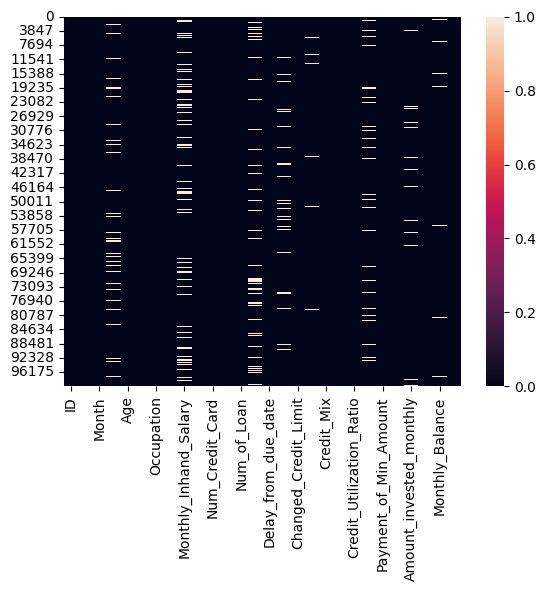

In [8]:
sns.heatmap(train.isnull())

In [9]:
duplicates = train[train.duplicated()]
num_duplicates = duplicates.shape[0]
num_duplicates

0

<Axes: ylabel='count'>

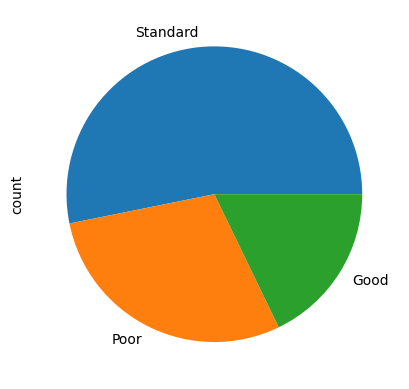

In [10]:
train.Credit_Score.value_counts().plot.pie()

<Axes: xlabel='Payment_of_Min_Amount', ylabel='count'>

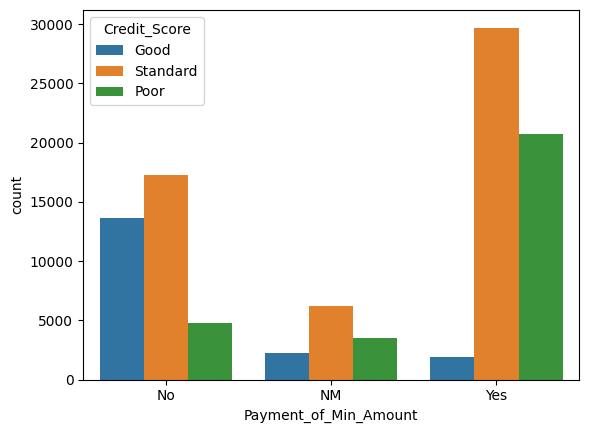

In [11]:
sns.countplot(x=train['Payment_of_Min_Amount'], hue=train['Credit_Score'])

In [12]:
# sns.histplot(train.Age)

In [13]:
train['Annual_Income'] = train['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True)
train['Annual_Income'] = train['Annual_Income'].astype(float)

In [14]:
def clean_and_convert(column):
    # Fill NaN with '0'
    column_filled = column.fillna('0')
    # Extract digits
    column_extracted = column_filled.str.extract('(\d+)')
    # Convert to float, then to int
    column_converted = column_extracted.astype(float).astype(int)
    return column_converted

In [15]:
train['Age'] = clean_and_convert(train['Age'])
train['Num_of_Loan'] = clean_and_convert(train['Num_of_Loan'])
train['Num_of_Delayed_Payment'] = clean_and_convert(train['Num_of_Delayed_Payment'])

In [16]:
def covert_age_to_months(age):
    if isinstance(age, str):
        years, months = map(int, age.split(' Years and ')[0].split()), map(int, age.split(' Years and ')[1].split(' Months')[0].split())
        total_years = sum(years)
        total_months = sum(months)
        total_age_in_months = total_years * 12 + total_months
        return total_age_in_months
    else:
        return 0

In [17]:
train['Credit_History_Age'] = train['Credit_History_Age'].apply(covert_age_to_months)

In [18]:
train['Credit_History_Age']

0        265
1          0
2        267
3        268
4        269
        ... 
99995    378
99996    379
99997    380
99998    381
99999    382
Name: Credit_History_Age, Length: 100000, dtype: int64

In [19]:
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].replace('_', np.nan)
train['Changed_Credit_Limit'] = pd.to_numeric(train['Changed_Credit_Limit'], errors='coerce')
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].fillna(0)

In [20]:
train['Monthly_Balance'] = train['Monthly_Balance'].astype(str)
train['Monthly_Balance'] = train['Monthly_Balance'].str.replace(r'[^0-9.-]+', '')
train['Monthly_Balance'] = pd.to_numeric(train['Monthly_Balance'], errors='coerce')
train['Monthly_Balance'] = train['Monthly_Balance'].fillna(0)

In [21]:
train['Outstanding_Debt'] = train['Outstanding_Debt'].astype(str)
train['Outstanding_Debt'] = train['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True)
train['Outstanding_Debt'] = pd.to_numeric(train['Outstanding_Debt'], errors='coerce')
train['Outstanding_Debt'] = train['Outstanding_Debt'].fillna(0)

In [22]:
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].astype(str)
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].replace('', '0')
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].str.replace(r'[^0-9.]', '')
train['Amount_invested_monthly'] = pd.to_numeric(train['Amount_invested_monthly'], errors='coerce')
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].fillna(0)

In [23]:
train['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [24]:
train = train.query("Payment_Behaviour != '!@9#%8'")

In [25]:
train['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: count, dtype: int64

In [26]:
train['Occupation'].value_counts()

Occupation
_______          6548
Lawyer           6079
Architect        5894
Engineer         5867
Mechanic         5810
Scientist        5798
Accountant       5790
Teacher          5767
Entrepreneur     5741
Media_Manager    5739
Developer        5729
Journalist       5624
Doctor           5620
Manager          5513
Musician         5479
Writer           5402
Name: count, dtype: int64

In [27]:
train = train.query("Occupation != '_______'")

In [28]:
train['Occupation'].value_counts()

Occupation
Lawyer           6079
Architect        5894
Engineer         5867
Mechanic         5810
Scientist        5798
Accountant       5790
Teacher          5767
Entrepreneur     5741
Media_Manager    5739
Developer        5729
Journalist       5624
Doctor           5620
Manager          5513
Musician         5479
Writer           5402
Name: count, dtype: int64

In [29]:
train['Credit_Mix'].value_counts()

Credit_Mix
Standard    31333
Good        20901
_           17364
Bad         16254
Name: count, dtype: int64

In [30]:
train = train.query("Credit_Mix != '_'")

In [31]:
train['Credit_Mix'].value_counts()

Credit_Mix
Standard    31333
Good        20901
Bad         16254
Name: count, dtype: int64

In [32]:
selected_columns_train = train[['Num_Bank_Accounts', 'Interest_Rate', 'Annual_Income', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Total_EMI_per_month', 'Num_of_Loan', 'Num_Credit_Card']]

percentile_threshold = 0.98
percentiles = selected_columns_train.quantile(percentile_threshold)

for column in selected_columns_train.columns:
    train = train[train[column] <= percentiles[column]]

In [33]:
columns_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Monthly_Inhand_Salary', 'Type_of_Loan']

train.drop(columns=columns_to_drop, inplace=True)

<ipython-input-33-3e7dff43a968>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=columns_to_drop, inplace=True)


In [34]:
train = train[train['Age'] < 60]
train = train[train['Num_Credit_Card'] <= 10]
train = train[train['Interest_Rate'] <= 50]
train = train[train['Num_of_Loan'] <= 12]
train = train[train['Num_Bank_Accounts'] <= 10]
train = train[train['Delay_from_due_date'] <= 60]
train = train[train['Changed_Credit_Limit'] <= 30]
train = train[train['Num_Credit_Inquiries'] <= 12]
train = train[train['Total_EMI_per_month'] <= 200]
train = train[train['Outstanding_Debt'] <= 1500]

<Axes: xlabel='Age', ylabel='Count'>

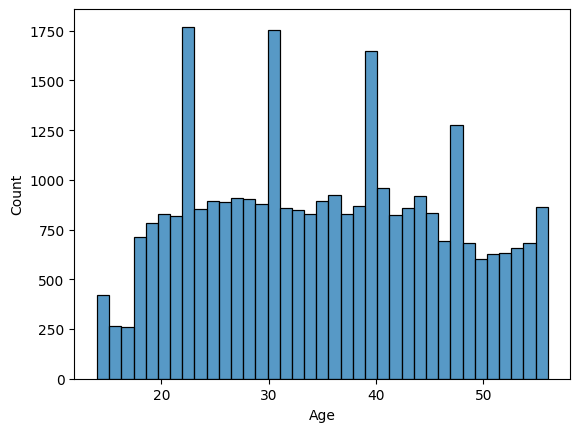

In [35]:
sns.histplot(train.Age)

In [36]:
selected_columns = ['Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Bank_Accounts']

for column in selected_columns:
    train = train[train[column] >= 0]

In [37]:
train['Total_Num_Accounts'] = train['Num_Bank_Accounts'] + train['Num_Credit_Card']

train['Debt_Per_Account'] = train['Outstanding_Debt'] / train['Total_Num_Accounts']

train['Debt_to_Income_Ratio'] = train['Outstanding_Debt'] / train['Annual_Income']

train['Delayed_Payments_Per_Account'] = train['Num_of_Delayed_Payment'] / train['Total_Num_Accounts']

train['Total_Monthly_Expenses'] = train['Total_EMI_per_month'] + train['Amount_invested_monthly']

In [38]:
label_encoder = LabelEncoder()
train['Occupation_Encoded'] = label_encoder.fit_transform(train['Occupation'])

In [39]:
categories_payment_behaviour = [
    'Low_spent_Small_value_payments',
    'Low_spent_Medium_value_payments',
    'Low_spent_Large_value_payments',
    'High_spent_Small_value_payments',
    'High_spent_Medium_value_payments',
    'High_spent_Large_value_payments'
]

encoder_payment_behaviour = OrdinalEncoder(categories=[categories_payment_behaviour])

train['Payment_Behaviour_Encoded'] = encoder_payment_behaviour.fit_transform(train[['Payment_Behaviour']])

In [40]:
categories = ['Bad', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

train['Credit_Mix_Encoded'] = encoder.fit_transform(train[['Credit_Mix']])

In [41]:
categories = ['Poor', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

train['Credit_Score_Encoded'] = encoder.fit_transform(train[['Credit_Score']])

In [42]:
columns_to_drop = [ 'Payment_Behaviour', 'Credit_Mix', 'Occupation','Credit_Score']
train.drop(columns=columns_to_drop, inplace=True)

In [43]:
categorical_columns = train.select_dtypes(include=['object']).columns
data = train.copy()
encoder = OrdinalEncoder()
data[categorical_columns] = encoder.fit_transform(data[categorical_columns])
y = data['Credit_Score_Encoded']
X = data.drop(columns=['Credit_Score_Encoded'])
mi_scores = mutual_info_classif(X, y)
for i, score in enumerate(mi_scores):
    print(f"Feature '{X.columns[i]} {score}")

Feature 'Age 0.011442538786691214
Feature 'Annual_Income 0.4276289384308034
Feature 'Num_Bank_Accounts 0.05816962360180988
Feature 'Num_Credit_Card 0.07310489065974002
Feature 'Interest_Rate 0.10445916177595493
Feature 'Num_of_Loan 0.020437214962452543
Feature 'Delay_from_due_date 0.06894385558120453
Feature 'Num_of_Delayed_Payment 0.048968030585540445
Feature 'Changed_Credit_Limit 0.10453634238330367
Feature 'Num_Credit_Inquiries 0.029566528943121506
Feature 'Outstanding_Debt 0.42980308276007473
Feature 'Credit_Utilization_Ratio 0.0007285541593138323
Feature 'Credit_History_Age 0.016359787300140427
Feature 'Payment_of_Min_Amount 0.07504270685361547
Feature 'Total_EMI_per_month 0.35045233059152325
Feature 'Amount_invested_monthly 0.0018623259648549162
Feature 'Monthly_Balance 0.004824014623486361
Feature 'Total_Num_Accounts 0.07554542462085556
Feature 'Debt_Per_Account 0.4308756823774047
Feature 'Debt_to_Income_Ratio 0.4332255932907365
Feature 'Delayed_Payments_Per_Account 0.0588034650

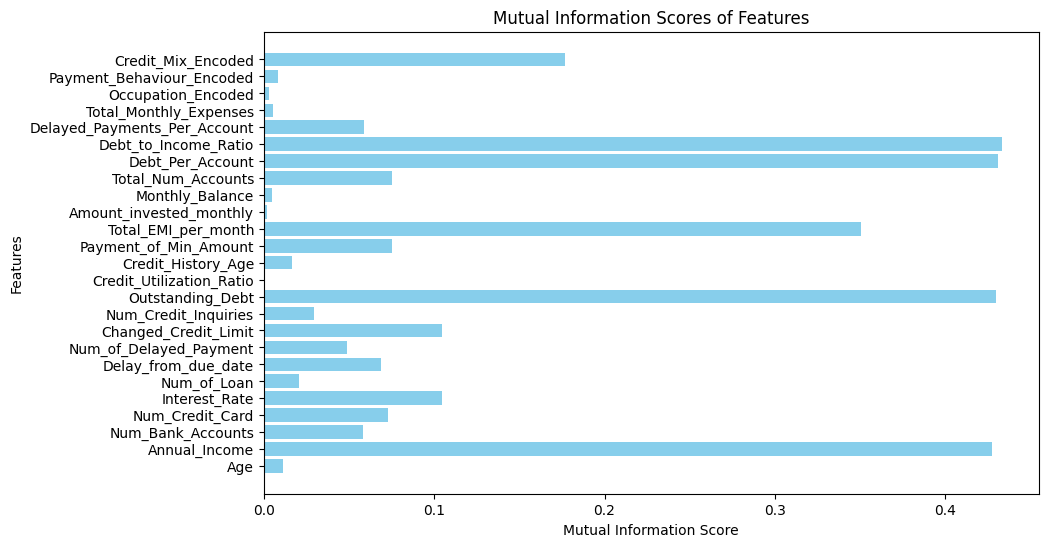

In [44]:
plt.figure(figsize=(10, 6))
plt.barh(X.columns, mi_scores, color='skyblue')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Mutual Information Scores of Features')
plt.show()


In [45]:
columns_to_drop = [ 'Payment_of_Min_Amount', 'Age', 'Monthly_Balance', 'Total_Monthly_Expenses', 'Payment_Behaviour_Encoded', 'Amount_invested_monthly', 'Credit_Utilization_Ratio', 'Occupation_Encoded']
train.drop(columns=columns_to_drop, inplace=True)

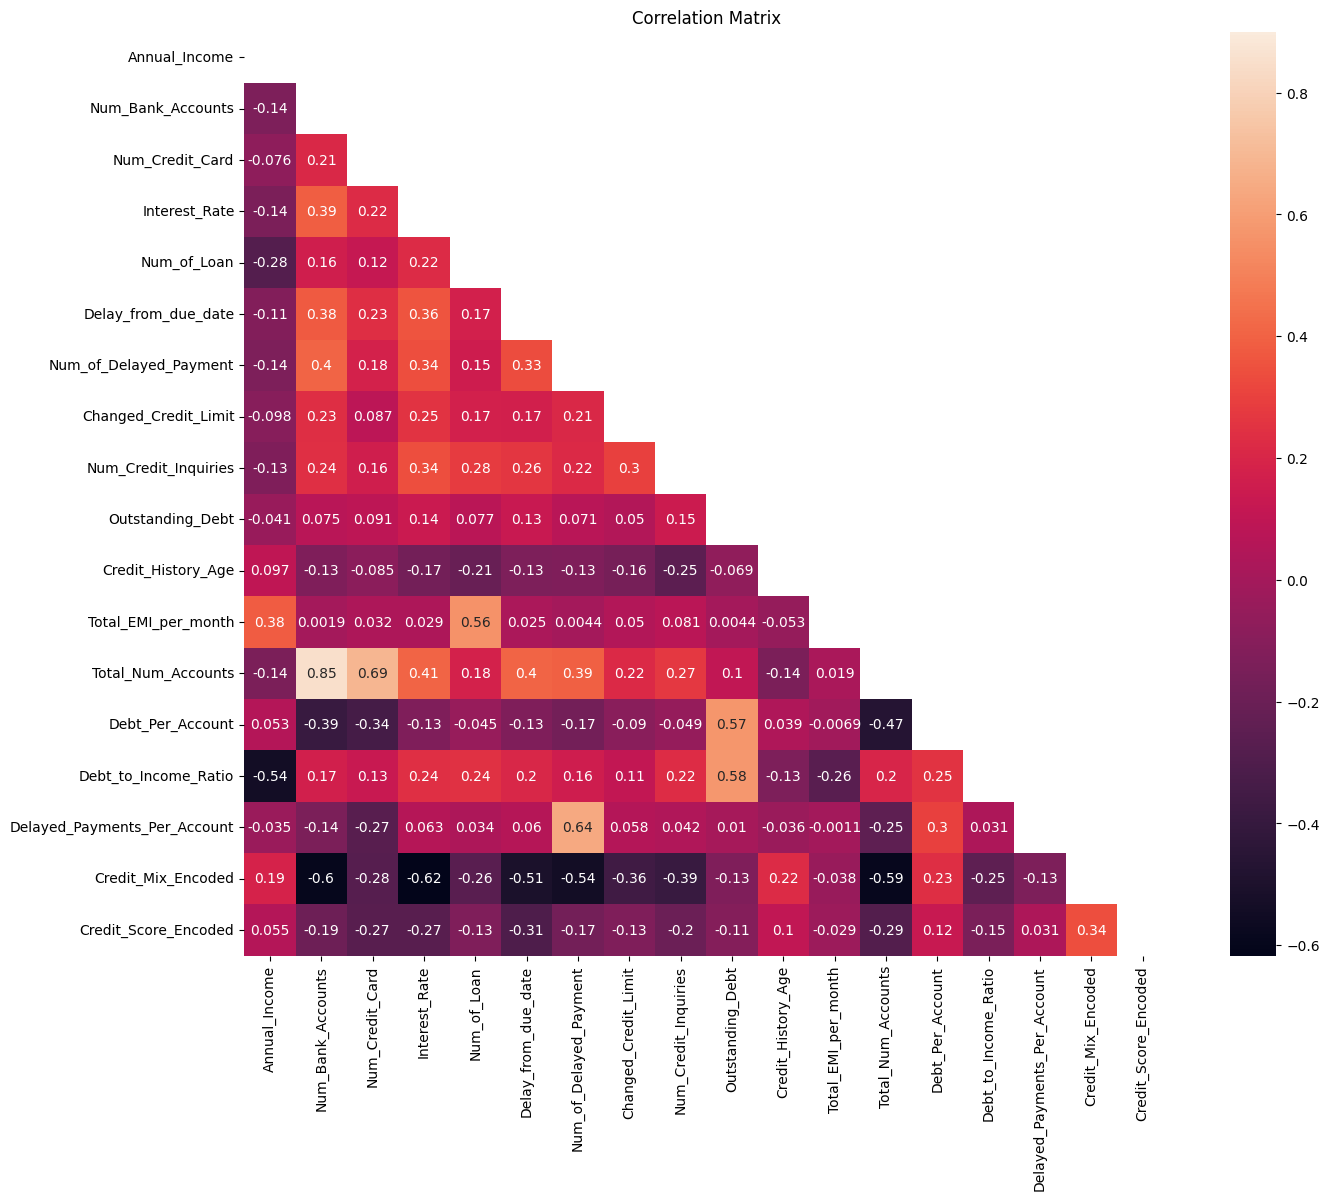

In [46]:
corr = train.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(corr, mask=mask, vmax=0.9, square=True, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [47]:
y = train['Credit_Score_Encoded']
X = train.drop(['Credit_Score_Encoded'], axis = 1)

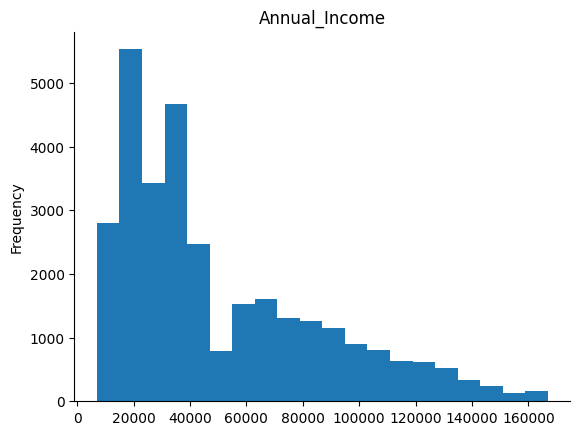

In [49]:
X['Annual_Income'].plot(kind='hist', bins=20, title='Annual_Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: ylabel='count'>

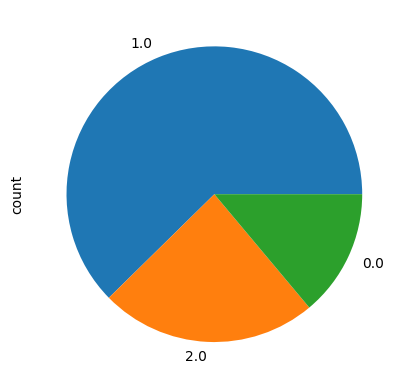

In [51]:
y.value_counts().plot.pie()
#impalance labels so we will use SMOTE

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [53]:
r_f = RandomForestClassifier(n_estimators=500, bootstrap=True, random_state=77)
r_f.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=77)

In [63]:
pre = r_f.predict(X_test)

In [66]:
# Bad Accuracy because of imbalance between classes so we will use SMOTE
# acc = accuracy_score(y_test , pre)
# acc

0.8020715326104547

In [57]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=77, k_neighbors=5, n_jobs=-1)

X_train = train.drop('Credit_Score_Encoded', axis=1)
y_train = train['Credit_Score_Encoded']

X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.15, random_state=77)

rf_classifier = RandomForestClassifier(n_estimators=500, bootstrap=True)

rf_classifier.fit(X_train_smote, y_train_smote)

print("Accuracy on training set:", rf_classifier.score(X_train_smote, y_train_smote))

y_pred_smote = rf_classifier.predict(X_test_smote)
accuracy_smote = accuracy_score(y_test_smote, y_pred_smote)

print("Accuracy on SMOTE test set:", accuracy_smote)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Accuracy on training set: 0.9995317875536918
Accuracy on SMOTE test set: 0.8900680585996078


<Axes: ylabel='count'>

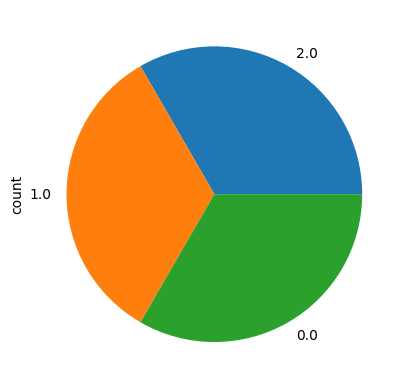

In [79]:
y_smote.value_counts().plot.pie()

In [58]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Final Accuracy is = ", accuracy)

Final Accuracy is =  0.9669849490208772


In [59]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 824   29    0]
 [  60 3751   80]
 [   1   34 1400]]


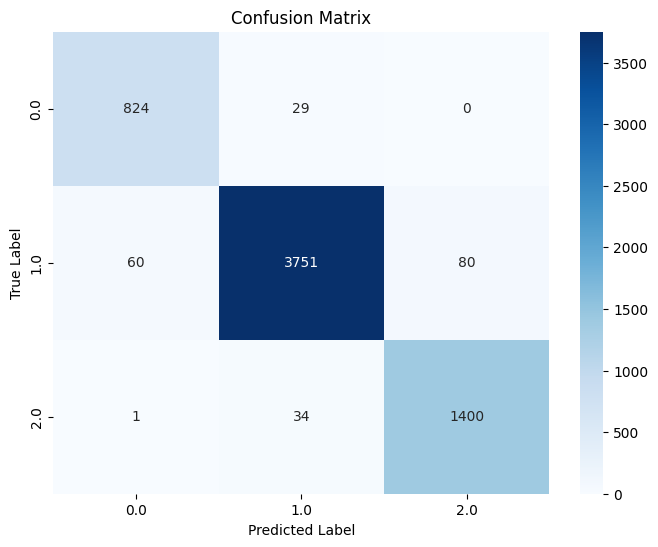

In [60]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [61]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       853
         1.0       0.98      0.96      0.97      3891
         2.0       0.95      0.98      0.96      1435

    accuracy                           0.97      6179
   macro avg       0.95      0.97      0.96      6179
weighted avg       0.97      0.97      0.97      6179



In [67]:
import joblib
joblib.dump(rf_classifier, 'your_model.pkl')

['your_model.pkl']